In [1]:
# import numpy package for arrays and stuff 
import numpy as np  
  
# import matplotlib.pyplot for plotting our result 
import matplotlib.pyplot as plt 
  
# import pandas for importing csv files  
import pandas as pd  

In [2]:
# Create artificial data set
dataset = np.array(
[[0, 'Model', 'Condition', 'Leslie', 'Price'], 
[1, 'B3', 'excellent', 'yes', 4513], 
[2, 'T202', 'fair', 'yes', 625], 
[3, 'A100', 'good', 'yes', 1051], 
[4, 'T202', 'good', 'no', 270], 
[5, 'M102', 'good', 'yes', 870], 
[6, 'A100', 'excellent', 'no', 1770], 
[7, 'T202', 'fair', 'no', 99],
[8, 'A100', 'good', 'yes', 1900],
[9, 'E112', 'fair', 'no', 77]
]) 

In [3]:
df = pd.DataFrame(data=dataset[1:,1:],    # values
index=dataset[1:,0],    # 1st column as index
columns=dataset[0,1:])  # 1st row as the column names
df = df.astype(dtype={"Model":"category", "Condition":"category","Leslie":"category", "Price":np.int})

In [30]:
df

,Model,Condition,Leslie,Price
1,B3,excellent,yes,4513
2,T202,fair,yes,625
3,A100,good,yes,1051
4,T202,good,no,270
5,M102,good,yes,870
6,A100,excellent,no,1770
7,T202,fair,no,99
8,A100,good,yes,1900
9,E112,fair,no,77


In [4]:
# One hot encoding
X = pd.get_dummies(df[["Model","Condition","Leslie"]],drop_first=True)
y = df['Price']

#print(X) 

In [14]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0, max_depth = 2)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [36]:
from auxiliaryFunctions import rules

In [39]:
#generate JSON file
rules(regressor, X.columns.values, [y.name])

{'children': [{'name': '4513 of Price'},
  {'children': [{'name': '267 of Price'}, {'name': '1172 of Price'}],
   'name': 'Condition_fair > 0.5'}],
 'name': 'Model_B3 > 0.5'}

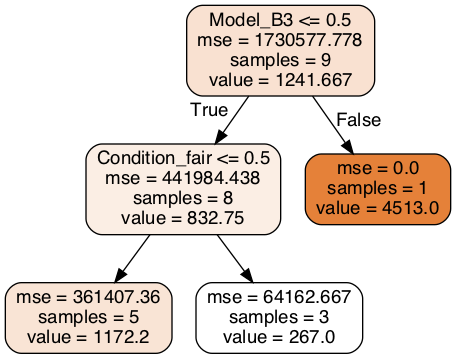

In [24]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display

dot_data = export_graphviz(
regressor, 
out_file=None,
feature_names=X.columns.values,  
filled=True,
rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))